# 쇼핑몰 매출분석 2
### 온라인 쇼핑몰 매출 분석 
   - 전체, 국가별 판매 지표 확인하기
   - 시간별 지역별 판매 지표 확인하기
   - 제품별 판매 지표 확인하기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 로딩

In [2]:
retail = pd.read_csv('./OnlineRetailClean.csv')
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


#### 날짜 타입 데이터 변환
- 문자열로 로딩하는 것보다 date/ datetime 타입으로 로딩하는 것이 분석에 용이

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281151 entries, 0 to 281150
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     281151 non-null  int64  
 1   InvoiceNo      281151 non-null  int64  
 2   StockCode      281151 non-null  object 
 3   Description    281151 non-null  object 
 4   Quantity       281151 non-null  int64  
 5   InvoiceDate    281151 non-null  object 
 6   UnitPrice      281151 non-null  float64
 7   CustomerID     281151 non-null  float64
 8   Country        281151 non-null  object 
 9   CheckoutPrice  281151 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 21.5+ MB


In [4]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281151 entries, 0 to 281150
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     281151 non-null  int64         
 1   InvoiceNo      281151 non-null  int64         
 2   StockCode      281151 non-null  object        
 3   Description    281151 non-null  object        
 4   Quantity       281151 non-null  int64         
 5   InvoiceDate    281151 non-null  datetime64[ns]
 6   UnitPrice      281151 non-null  float64       
 7   CustomerID     281151 non-null  float64       
 8   Country        281151 non-null  object        
 9   CheckoutPrice  281151 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 21.5+ MB


#### 해당 기간 동안의 매출
 - 전체 매출
 - 국가별 매출
 - 월별 매출
 - 요일별 매출
 - 시간별 매출

#### 전체 매출

In [5]:
total = retail['CheckoutPrice'].sum()
total

6529793.633999999

#### 국가별 매출

In [6]:
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia            1.459200e+02
USA                     3.839500e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Malta                   1.982160e+03
Unspecified             2.667070e+03
Iceland                 2.790860e+03
Canada                  3.666380e+03
Greece                  4.079530e+03
Poland                  5.973420e+03
Austria                 7.141920e+03
Israel                  7.221690e+03
Italy                   9.222020e+03
Cyprus                  9.513360e+03
Singapore               1.421197e+04
Denmark                 1.548751e+04
Finland                 1.573096e+04
Channel Islands         1.787495e+04
Norway                  2.316501e+04
Portugal                2.381811e+04
Japan                   2.700825e+04
Belgium                 2.8124

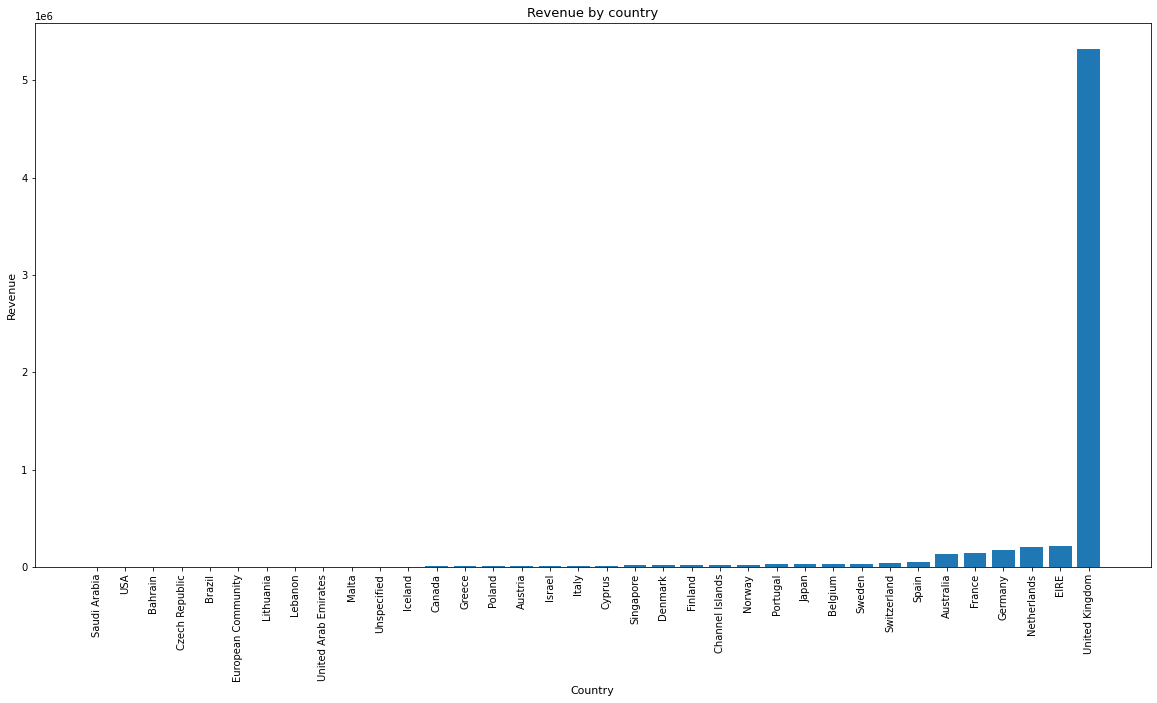

In [7]:
plt.figure(figsize=(20,10))
plt.bar(rev_by_countries.index, rev_by_countries.values, tick_label=rev_by_countries.index)
plt.xlabel('Country',fontsize=11)
plt.ylabel('Revenue',fontsize=11)
plt.title('Revenue by country',fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [8]:
# 국가별 판매량
rev_by_countries / total

Country
Saudi Arabia            0.000022
USA                     0.000059
Bahrain                 0.000084
Czech Republic          0.000127
Brazil                  0.000175
European Community      0.000199
Lithuania               0.000254
Lebanon                 0.000259
United Arab Emirates    0.000291
Malta                   0.000304
Unspecified             0.000408
Iceland                 0.000427
Canada                  0.000561
Greece                  0.000625
Poland                  0.000915
Austria                 0.001094
Israel                  0.001106
Italy                   0.001412
Cyprus                  0.001457
Singapore               0.002176
Denmark                 0.002372
Finland                 0.002409
Channel Islands         0.002737
Norway                  0.003548
Portugal                0.003648
Japan                   0.004136
Belgium                 0.004307
Sweden                  0.004541
Switzerland             0.006617
Spain                   0.006795
Au

#### 월별 매출

In [9]:
retail['InvoiceDate'].sort_values(ascending=True)

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
281127   2011-10-10 14:02:00
281126   2011-10-10 14:02:00
281149   2011-10-10 14:02:00
281137   2011-10-10 14:02:00
281150   2011-10-10 14:02:00
Name: InvoiceDate, Length: 281151, dtype: datetime64[ns]

In [10]:
month = []
dow = []  #day of week
hour = []
          #[0,1,2,3,4.......397883]
for i in range(len(retail['InvoiceDate'])) :   #InvoiceDate 행 개수만큼 반복

        if retail['InvoiceDate'][i].month < 10 : #월에서 1월은 01월로 표현하기 위해            
            month.append(str(retail['InvoiceDate'][i].year) + '0' + str(retail['InvoiceDate'][i].month))  #Datatime 객체 형식 InvoiceDate에서 년도와 월만 분리
        else :
            month.append(str(retail['InvoiceDate'][i].year) + str(retail['InvoiceDate'][i].month))  #Datatime 객체 형식 InvoiceDate에서 년도와 월만 분리
      
        dow.append(retail['InvoiceDate'][i].dayofweek)    #Datatime 객체 형식 InvoiceDate에서 요일만 분리  
        hour.append(retail['InvoiceDate'][i].hour)    #Datatime 객체 형식 InvoiceDate에서 시간만 분리

In [11]:
len(month)

281151

In [12]:
retail['InvoiceDate_month'] = month
retail['InvoiceDate_dow'] = dow
retail['InvoiceDate_hour'] = hour

retail.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'CheckoutPrice',
       'InvoiceDate_month', 'InvoiceDate_dow', 'InvoiceDate_hour'],
      dtype='object')

In [13]:
rev_by_month = retail.groupby('InvoiceDate_month').sum()['CheckoutPrice']
rev_by_month

InvoiceDate_month
201012    572713.890
201101    569445.040
201102    447137.350
201103    595500.760
201104    469200.361
201105    678594.560
201106    661213.690
201107    600091.011
201108    645343.900
201109    952838.382
201110    337714.690
Name: CheckoutPrice, dtype: float64

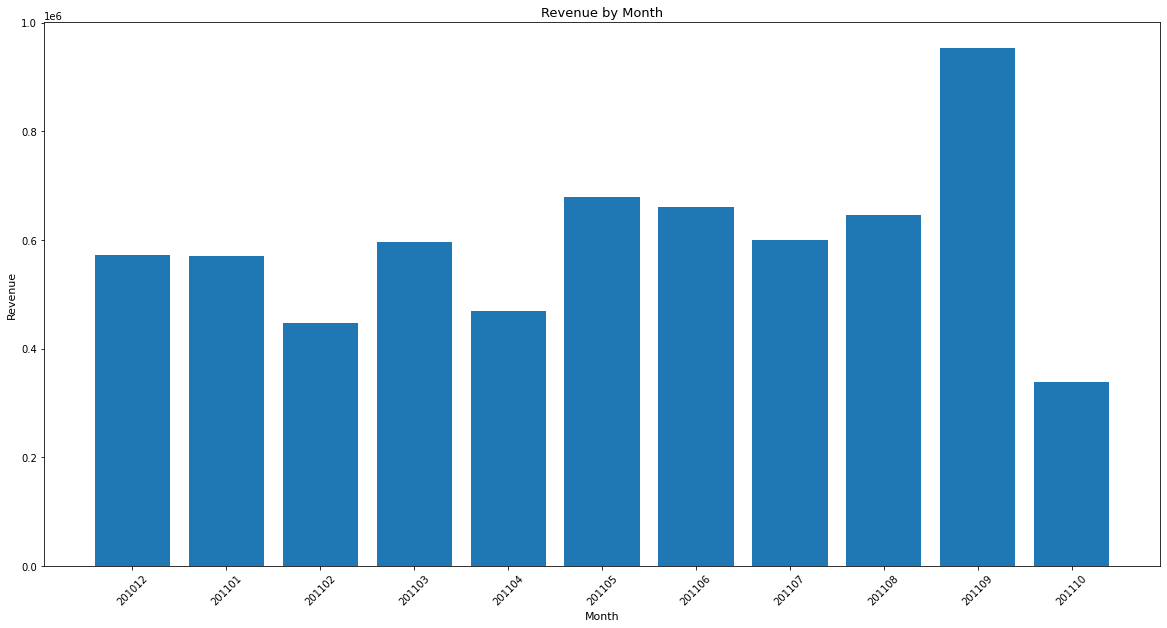

In [14]:
plt.figure(figsize=(20,10))
plt.bar(rev_by_month.index, rev_by_month.values, tick_label= rev_by_month.index)
plt.xlabel('Month', fontsize=11)
plt.ylabel('Revenue', fontsize=11)
plt.title('Revenue by Month', fontsize=13)
plt.xticks(rotation=45)
plt.show()

#### 요일별 매출

In [15]:
rev_by_dow = retail.groupby('InvoiceDate_dow').sum()['CheckoutPrice']
rev_by_dow

InvoiceDate_dow
0     990787.921
1    1320841.971
2    1157356.950
3    1506215.480
4     970415.401
6     584175.911
Name: CheckoutPrice, dtype: float64

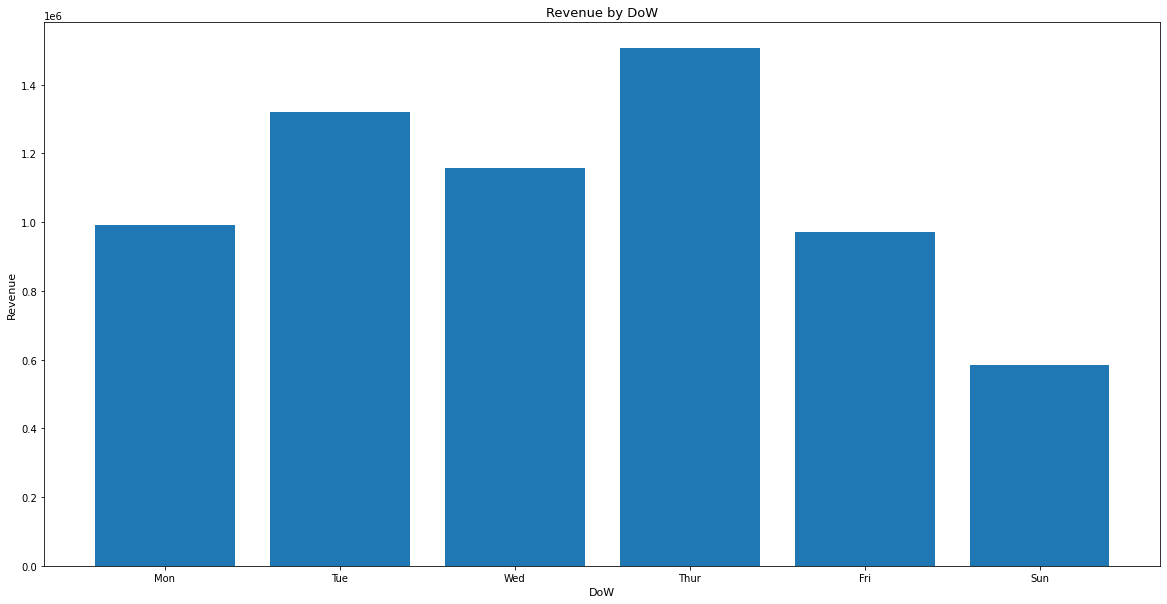

In [16]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plt.figure(figsize=(20,10))
plt.bar(rev_by_dow.index, rev_by_dow.values, tick_label=rev_by_dow.index)
plt.xlabel('DoW', fontsize=11)
plt.ylabel('Revenue', fontsize=11)
plt.title('Revenue by DoW', fontsize=13)
plt.show()

#### 시간별 매출

In [17]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,InvoiceDate_month,InvoiceDate_dow,InvoiceDate_hour
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,201012,2,8
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2,8
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,201012,2,8
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2,8
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2,8


In [18]:
rev_by_hour = retail.groupby('InvoiceDate_hour').sum()['CheckoutPrice']
rev_by_hour

InvoiceDate_hour
6          4.250
7      18951.960
8     201116.360
9     531999.381
10    977641.421
11    871706.120
12    990081.600
13    886581.600
14    718339.711
15    711994.510
16    326347.180
17    158527.041
18     81650.560
19     37616.710
20     17235.230
Name: CheckoutPrice, dtype: float64

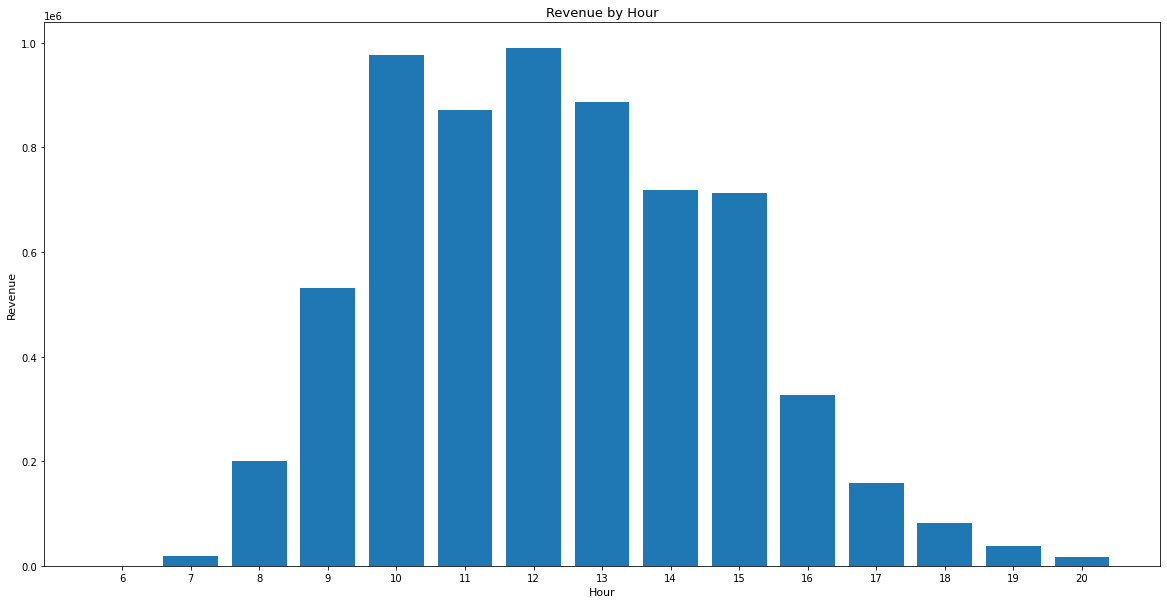

In [19]:
plt.figure(figsize=(20,10))
plt.bar(rev_by_hour.index, rev_by_hour.values, tick_label= rev_by_hour.index)
plt.xlabel('Hour', fontsize=11)
plt.ylabel('Revenue', fontsize=11)
plt.title('Revenue by Hour', fontsize=13)
plt.show()

#### 제품별 매출

In [20]:
# top 3 상품
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)
top_selling[:3]

StockCode
23166     76902
84077     41511
85099B    36937
Name: Quantity, dtype: int64

In [21]:
# top 10 매출
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
22423     119716.24
85123A     80642.53
23166      80270.19
85099B     67726.81
47566      63020.57
POST       58591.51
22502      47366.20
84879      43046.48
M          32309.78
79321      31276.77
Name: CheckoutPrice, dtype: float64